In [55]:
import json
import matplotlib.pyplot as plt
import numpy as np
import statistics
from matplotlib.ticker import LogLocator, LogFormatter
from matplotlib.lines import Line2D
import os
import re
from tabulate import tabulate
from matplotlib.ticker import FormatStrFormatter
import scipy.stats as stats
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter

# Setup

In [2]:
figureFolder = "./figure"

In [3]:
typeIndexResultFile = "./data/type_index_result.json"
shapeIndexResultFile = "./data/shape_index_result.json"

typeIndexSummaryResultFile = "./data/summary_type_index_result.json"
shapeIndexSummaryResultFile = "./data/summary_shape_index_result.json"

In [4]:
typeIndexResult = None
shapeIndexResult = None

typeIndexSummaryResult = None
shapeIndexSummaryResult = None

In [5]:
with open(typeIndexResultFile, 'rb') as rf:
    typeIndexResult = json.load(rf)
    
with open(shapeIndexResultFile, 'rb') as rf:
    shapeIndexResult = json.load(rf)

with open(typeIndexSummaryResultFile, 'rb') as rf:
    typeIndexSummaryResult = json.load(rf)
    
with open(shapeIndexSummaryResultFile, 'rb') as rf:
    shapeIndexSummaryResult = json.load(rf)

In [6]:
executionTimeTypeIndex = {}
executionTimeShapeIndex = {}

elementWithNotIdenticalResult = []

meanExecutionTimeTypeIndex = {}
meanExecutionTimeShapeIndex = {}

numberHttpRequestTypeIndex = {}
numberHttpRequestShapeIndex = {}

stdExecutionTimeTypeIndex = {}
stdExecutionTimeShapeIndex = {}

In [7]:
for queryName, versionData in typeIndexResult["data"].items():
    executionTimeTypeIndex[queryName] = {}
    executionTimeShapeIndex[queryName] = {}
    for version, repetitionData in versionData.items():
        executionTimeTypeIndex[queryName][version] = []
        executionTimeShapeIndex[queryName][version] = []
        for i, repetition in enumerate(repetitionData):
            if(type(repetition)!=str):
                setResultTypeIndex = {e for l in repetition['results'] for e in l}
                setResultShapeIndex = {e for l in shapeIndexResult["data"][queryName][version][i]['results'] for e in l}
                
                executionTimeTypeIndex[queryName][version].append(repetition['execution_time'])
                executionTimeShapeIndex[queryName][version].append(shapeIndexResult["data"][queryName][version][i]['execution_time'])
                
                # Validate that the results are the same
                if setResultTypeIndex!= setResultShapeIndex :
                    elementWithNotIdenticalResult.append([queryName, version, i])
            else:
                executionTimeTypeIndex[queryName][version].append(-1)
                    
for queryName, versionData in shapeIndexResult["data"].items():
    executionTimeShapeIndex[queryName] = {}
    for version, repetitionData in versionData.items():
        executionTimeShapeIndex[queryName][version] = []
        for i, repetition in enumerate(repetitionData):
            if(type(repetition)!=str):
                executionTimeShapeIndex[queryName][version].append(shapeIndexResult["data"][queryName][version][i]['execution_time'])
            else:
                executionTimeShapeIndex[queryName][version].append(-1)

In [8]:
for queryName, versionData in shapeIndexSummaryResult.items():
    meanExecutionTimeShapeIndex[queryName] = []
    numberHttpRequestShapeIndex[queryName] = []
    stdExecutionTimeShapeIndex[queryName] = []
    for version, data in versionData.items():
        for field, value in data.items():
            if field=="timeout":
                meanExecutionTimeShapeIndex[queryName].append(-1)
                numberHttpRequestShapeIndex[queryName].append(-1)
                stdExecutionTimeShapeIndex[queryName].append(-1)
            if field=="n_http_requests":
                numberHttpRequestShapeIndex[queryName].append(value)
            if field=="execution_time":
                meanExecutionTimeShapeIndex[queryName].append(value["average"])
                stdExecutionTimeShapeIndex[queryName].append(value["std"])

for queryName, versionData in typeIndexSummaryResult.items():
    meanExecutionTimeTypeIndex[queryName] = []
    numberHttpRequestTypeIndex[queryName] = []
    stdExecutionTimeTypeIndex[queryName] = []
    for version, data in versionData.items():
        for field, value in data.items():
            if field=="timeout":
                meanExecutionTimeTypeIndex[queryName].append(-1)
                numberHttpRequestTypeIndex[queryName].append(-1)
                stdExecutionTimeTypeIndex[queryName].append(-1)
            if field=="n_http_requests":
                numberHttpRequestTypeIndex[queryName].append(value)
            if field=="execution_time":
                meanExecutionTimeTypeIndex[queryName].append(value["average"])
                stdExecutionTimeTypeIndex[queryName].append(value["std"])
                

In [9]:
print("The none identical results are the following: {}".format(elementWithNotIdenticalResult))

The none identical results are the following: []


# Query execution time

## Util

In [10]:
def colorViolon(part, color):  
    for pc in part['bodies']:
        pc.set_color(color)
        pc.set_edgecolor(color)
        pc.set_edgecolor(color)
        pc.set_alpha(0.75)
    part['cmeans'].set_color('black')
    part['cmins'].set_color('black')
    part['cmaxes'].set_color('black')
    part['cbars'].set_color('black')
    part['cmedians'].set_color('black')

## Single plot

###  Util

In [11]:
def plotOneQueryExecutionTime(queryName, queryLabelTemplate):
    indexes = np.linspace(0, 0.25, 5)
    yaxisIndexes = np.arange(0, 2500, 500)
    
    allDataShapeIndex = [data for label,data in executionTimeShapeIndex[queryName].items()]
    allDataTypeIndex = [data for label,data in executionTimeTypeIndex[queryName].items()]
    
    width = 0.05 
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_yticks(yaxisIndexes)
    ax.set_xticks(indexes)
    ax.set_xticklabels(["{}V{}".format(queryLabelTemplate,i) for i,v in enumerate(indexes)])
    labels = []
    
    partsShapeIndex = ax.violinplot(allDataShapeIndex, indexes, widths=width, showmeans=True, showmedians=True)
    partsTypeIndex = ax.violinplot(allDataTypeIndex, indexes, widths=width, showmeans=True, showmedians=True)
    
    ax.set_xlabel("Query")
    ax.set_ylabel("Execution time (ms)")
    ax.grid(axis="x")
    
    colorViolon(partsShapeIndex,'#1A85FF')
    colorViolon(partsTypeIndex,'#D41159')
    
    legend_elements = [
    Line2D([0], [0], color='#1A85FF', label='Shape Index'),
    Line2D([0], [0], color='#D41159', label='Type Index')
    ]
    ax.legend(handles=legend_elements)

### Plots

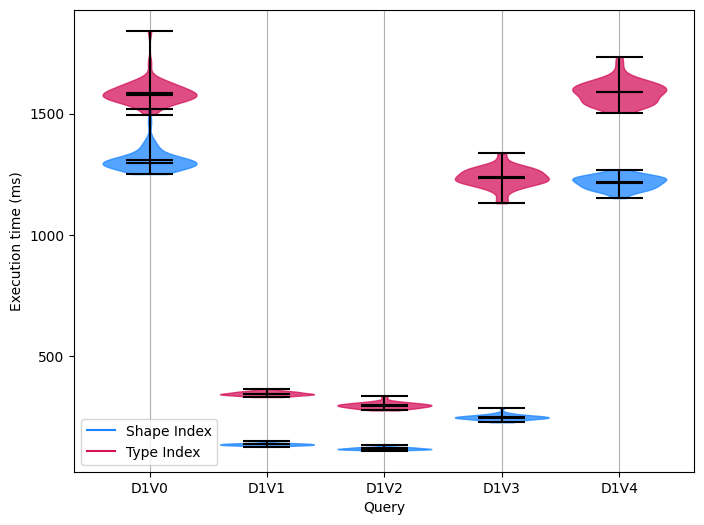

In [12]:
queryName ="queries/parsed/interactive-discover-1.sparql.json"
plotOneQueryExecutionTime(queryName, "D1")

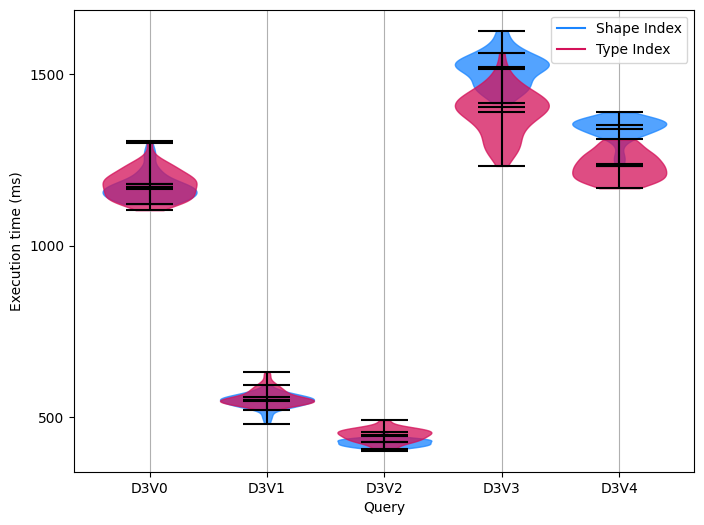

In [13]:
queryName ="queries/parsed/interactive-discover-3.sparql.json"
plotOneQueryExecutionTime(queryName,"D3")

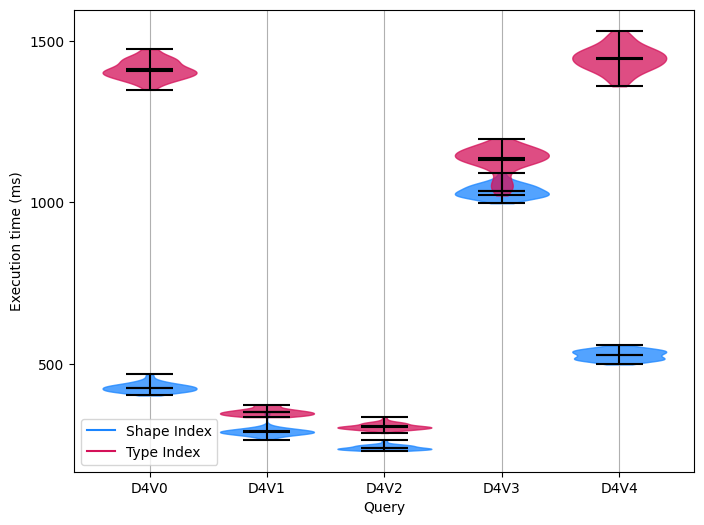

In [14]:
queryName ="queries/parsed/interactive-discover-4.sparql.json"
plotOneQueryExecutionTime(queryName, "D4")

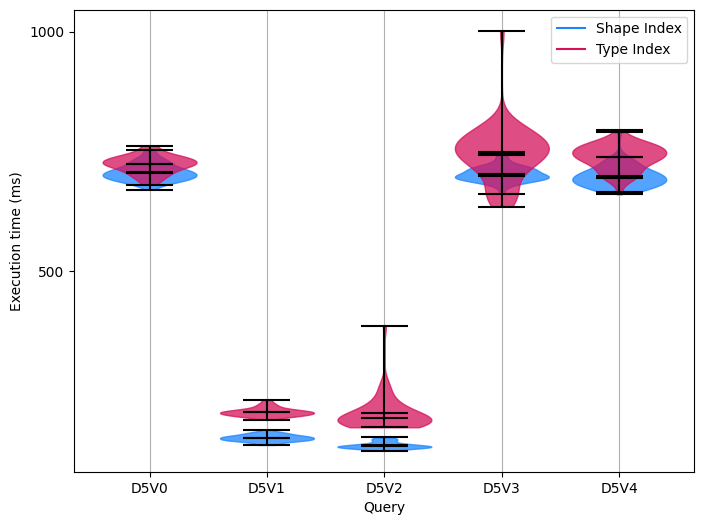

In [15]:
queryName ="queries/parsed/interactive-discover-5.sparql.json"
plotOneQueryExecutionTime(queryName, "D5")

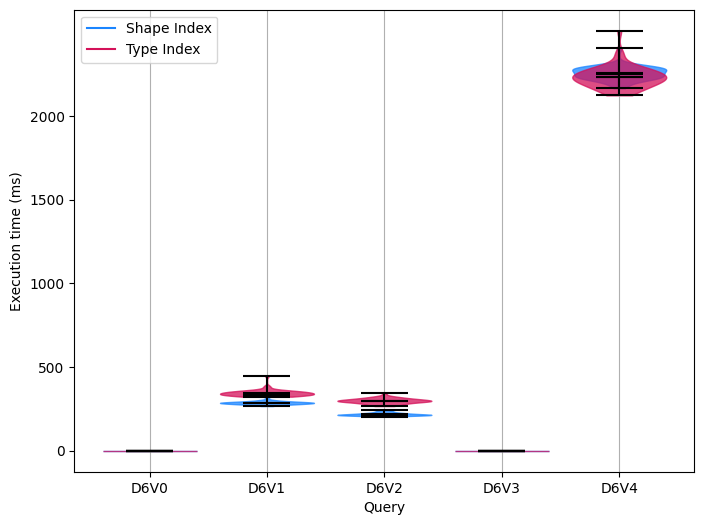

In [16]:
queryName ="queries/parsed/interactive-discover-6.sparql.json"
plotOneQueryExecutionTime(queryName, "D6")

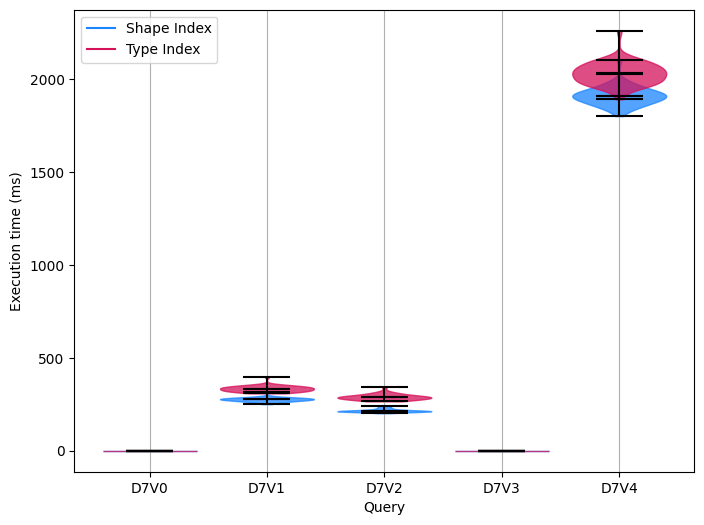

In [17]:
queryName ="queries/parsed/interactive-discover-7.sparql.json"
plotOneQueryExecutionTime(queryName, "D7")

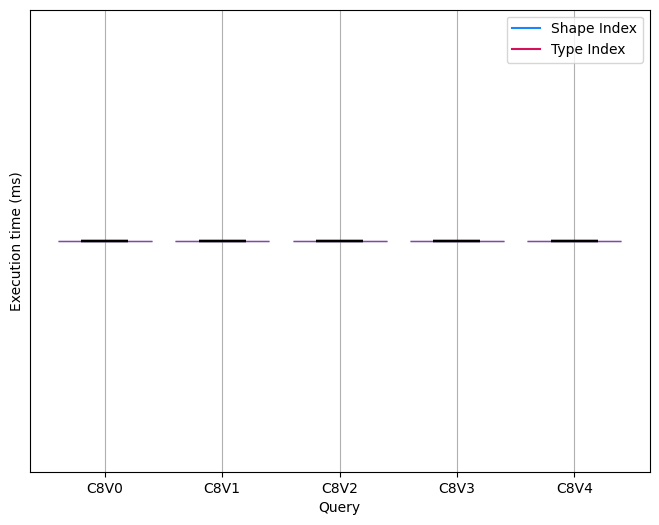

In [18]:
queryName ="queries/parsed/interactive-complex-8.sparql.json"
plotOneQueryExecutionTime(queryName, "C8")

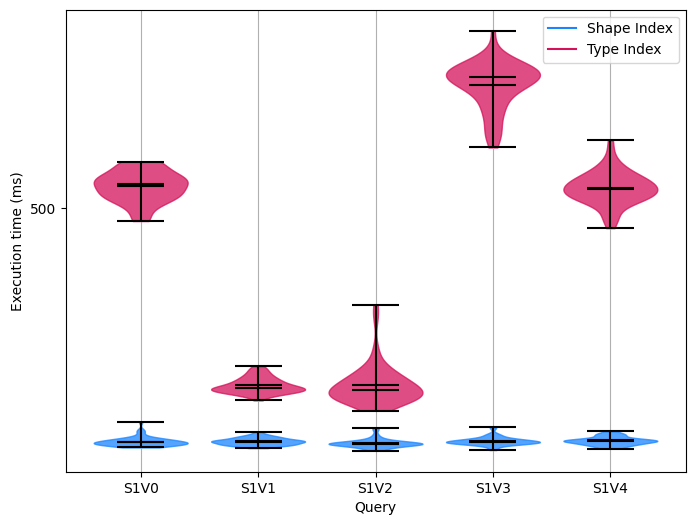

In [19]:
queryName ="queries/parsed/interactive-short-1.sparql.json"
plotOneQueryExecutionTime(queryName, "S1")

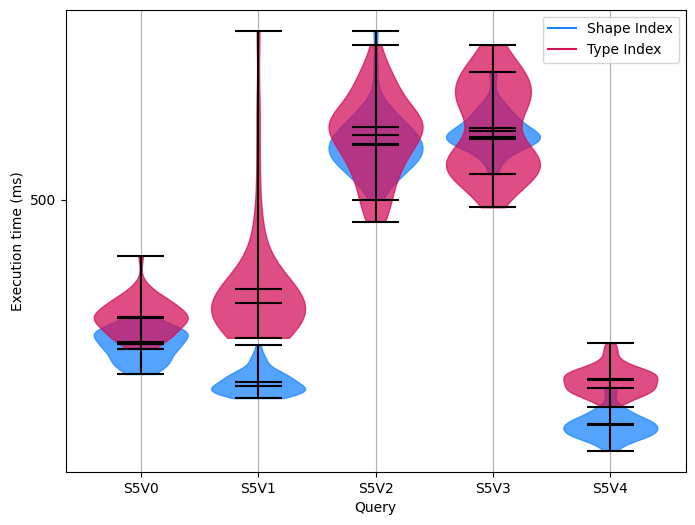

In [20]:
queryName ="queries/parsed/interactive-short-5.sparql.json"
plotOneQueryExecutionTime(queryName, "S5")

### Demo

[0.   1.25 2.5  3.75 5.  ]


Text(0, 0.5, 'Execution time')

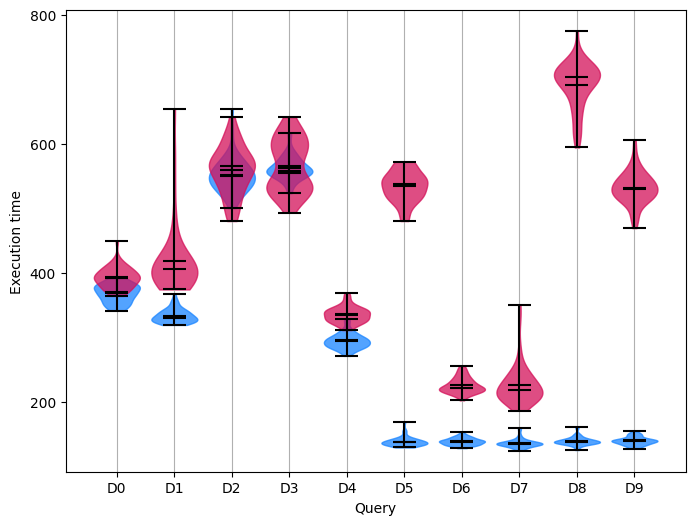

In [21]:
queryNameShort5 ="queries/parsed/interactive-short-5.sparql.json"

allDataShapeIndexShort5 = [data for label,data in executionTimeShapeIndex[queryNameShort5].items()]
allDataTypeIndexShort5  = [data for label,data in executionTimeTypeIndex[queryNameShort5].items()]


queryNameShort1 ="queries/parsed/interactive-short-1.sparql.json"

allDataShapeIndexShort1 = [data for label,data in executionTimeShapeIndex[queryNameShort1].items()]
allDataTypeIndexShort1 = [data for label,data in executionTimeTypeIndex[queryNameShort1].items()]


width = 1
tempindexes = np.linspace(0, 5, 5)
print(tempindexes)
yaxisIndexes = np.arange(0, 2500, 200)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yticks(yaxisIndexes)

xticks = [1.25*i for i in range(0,10)]
ax.set_xticks(xticks)
ax.set_xticklabels(["D{}".format(i,i) for i,v in enumerate(xticks)])
ax.grid(axis="x")



partsShapeIndex = ax.violinplot(allDataShapeIndexShort5, tempindexes, widths=width, showmeans=True, showmedians=True)
partsTypeIndex = ax.violinplot(allDataTypeIndexShort5, tempindexes, widths=width, showmeans=True, showmedians=True)
colorViolon(partsShapeIndex,'#1A85FF')
colorViolon(partsTypeIndex,'#D41159')

partsShapeIndex = ax.violinplot(allDataShapeIndexShort1, tempindexes+tempindexes[-1]+1.25, widths=width, showmeans=True, showmedians=True)
partsTypeIndex = ax.violinplot(allDataTypeIndexShort1, tempindexes+tempindexes[-1]+1.25, widths=width, showmeans=True, showmedians=True)
colorViolon(partsShapeIndex,'#1A85FF')
colorViolon(partsTypeIndex,'#D41159')

ax.set_xlabel("Query")
ax.set_ylabel("Execution time")

## All queries

### Util

In [22]:
def appendPlotExecutionTime(ax, query, indexes):
    
    allDataShapeIndex = [data for label,data in executionTimeShapeIndex[query].items()]
    allDataTypeIndex  = [data for label,data in executionTimeTypeIndex[query].items()]
    
    partsShapeIndex = ax.violinplot(allDataShapeIndex, indexes, widths=width, showmeans=True, showmedians=True)
    partsTypeIndex = ax.violinplot(allDataTypeIndex, indexes, widths=width, showmeans=True, showmedians=True)
    
    colorViolon(partsShapeIndex,'#1A85FF')
    colorViolon(partsTypeIndex,'#D41159')

### Plots

In [23]:
queries = [
    ["queries/parsed/interactive-short-1.sparql.json", "S1V"],
    ["queries/parsed/interactive-short-5.sparql.json", "S5V"],
    
    ["queries/parsed/interactive-discover-1.sparql.json", "D1V"],
    ["queries/parsed/interactive-discover-3.sparql.json", "D3V"],
    ["queries/parsed/interactive-discover-4.sparql.json", "D4V"],
    ["queries/parsed/interactive-discover-5.sparql.json", "D5V"],
    ["queries/parsed/interactive-discover-7.sparql.json", "D7V"],

    #["queries/parsed/interactive-complex-8.sparql.json", "C8V"],
]

queriesBetterPerformance = [
    ["queries/parsed/interactive-short-1.sparql.json", "S1V"],
    #["queries/parsed/interactive-short-5.sparql.json", "S5V"],
    
    ["queries/parsed/interactive-discover-1.sparql.json", "D1V"],
    #["queries/parsed/interactive-discover-3.sparql.json", "D3V"],
    ["queries/parsed/interactive-discover-4.sparql.json", "D4V"],
    ["queries/parsed/interactive-discover-5.sparql.json", "D5V"],
    ["queries/parsed/interactive-discover-7.sparql.json", "D7V"],

    #["queries/parsed/interactive-complex-8.sparql.json", "C8V"],
]

queriesSimilarPerformance = [
    #["queries/parsed/interactive-short-1.sparql.json", "S1V"],
    ["queries/parsed/interactive-short-5.sparql.json", "S5V"],
    
    #["queries/parsed/interactive-discover-1.sparql.json", "D1V"],
    ["queries/parsed/interactive-discover-3.sparql.json", "D3V"],
    #["queries/parsed/interactive-discover-4.sparql.json", "D4V"],
    #["queries/parsed/interactive-discover-5.sparql.json", "D5V"],
    #["queries/parsed/interactive-discover-7.sparql.json", "D7V"],

    #["queries/parsed/interactive-complex-8.sparql.json", "C8V"],
]

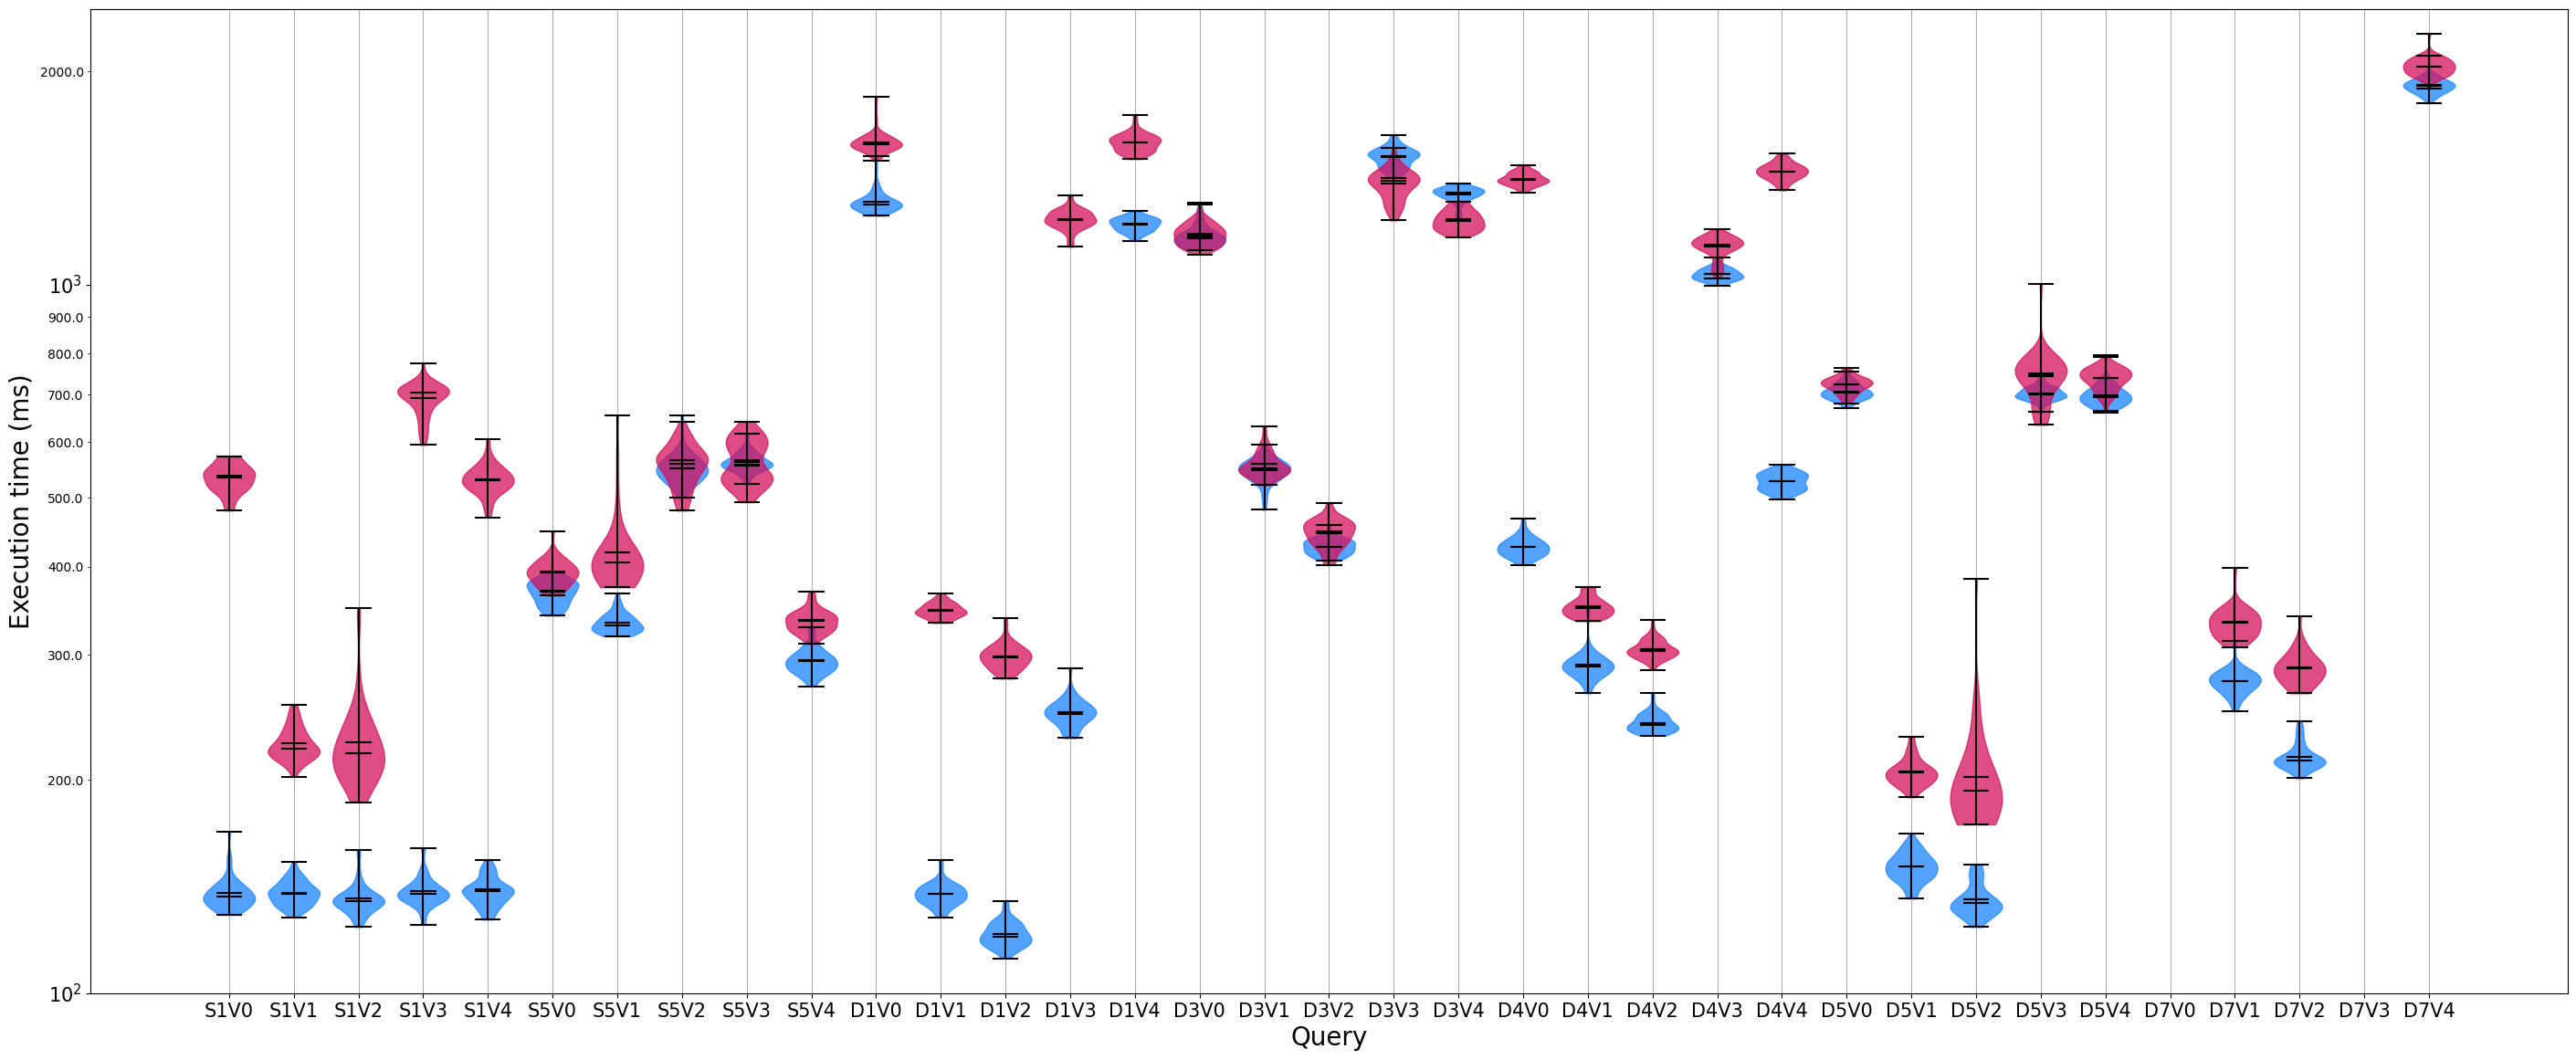

In [24]:
yaxisIndexes = np.arange(50, 2500, 200)
fig, ax = plt.subplots()
ratio = 6/15
number = 35
fig.set_size_inches(number, number*ratio)
ax.set_yticks(yaxisIndexes)
ax.set_ylim(bottom=100)
ax.set_yscale('log', base=10)

xticks = [1.25*i for i in range(0,5*len(queries))]
ax.set_xticks(xticks)
xtickLabel = []
for _,label in queries:
    xtickLabel+= ["{}{}".format(label, i) for i in range(0,5)]
ax.set_xticklabels(xtickLabel, fontsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))

ax.set_xlabel("Query", fontsize=20)
ax.set_ylabel("Execution time (ms)", fontsize=20)
ax.grid(axis="x")

indexes =  np.linspace(0, 5, 5)
initialIndex = np.linspace(0, 5, 5)
for query,_ in queries:
    appendPlotExecutionTime(ax, query, indexes)
    indexes = np.arange(indexes[-1]+1.25, indexes[-1]+6.25+0.1, 1.25)
pathAllQueries = os.path.join(figureFolder,"all_queries_execution_time.svg")
fig.savefig(pathAllQueries)

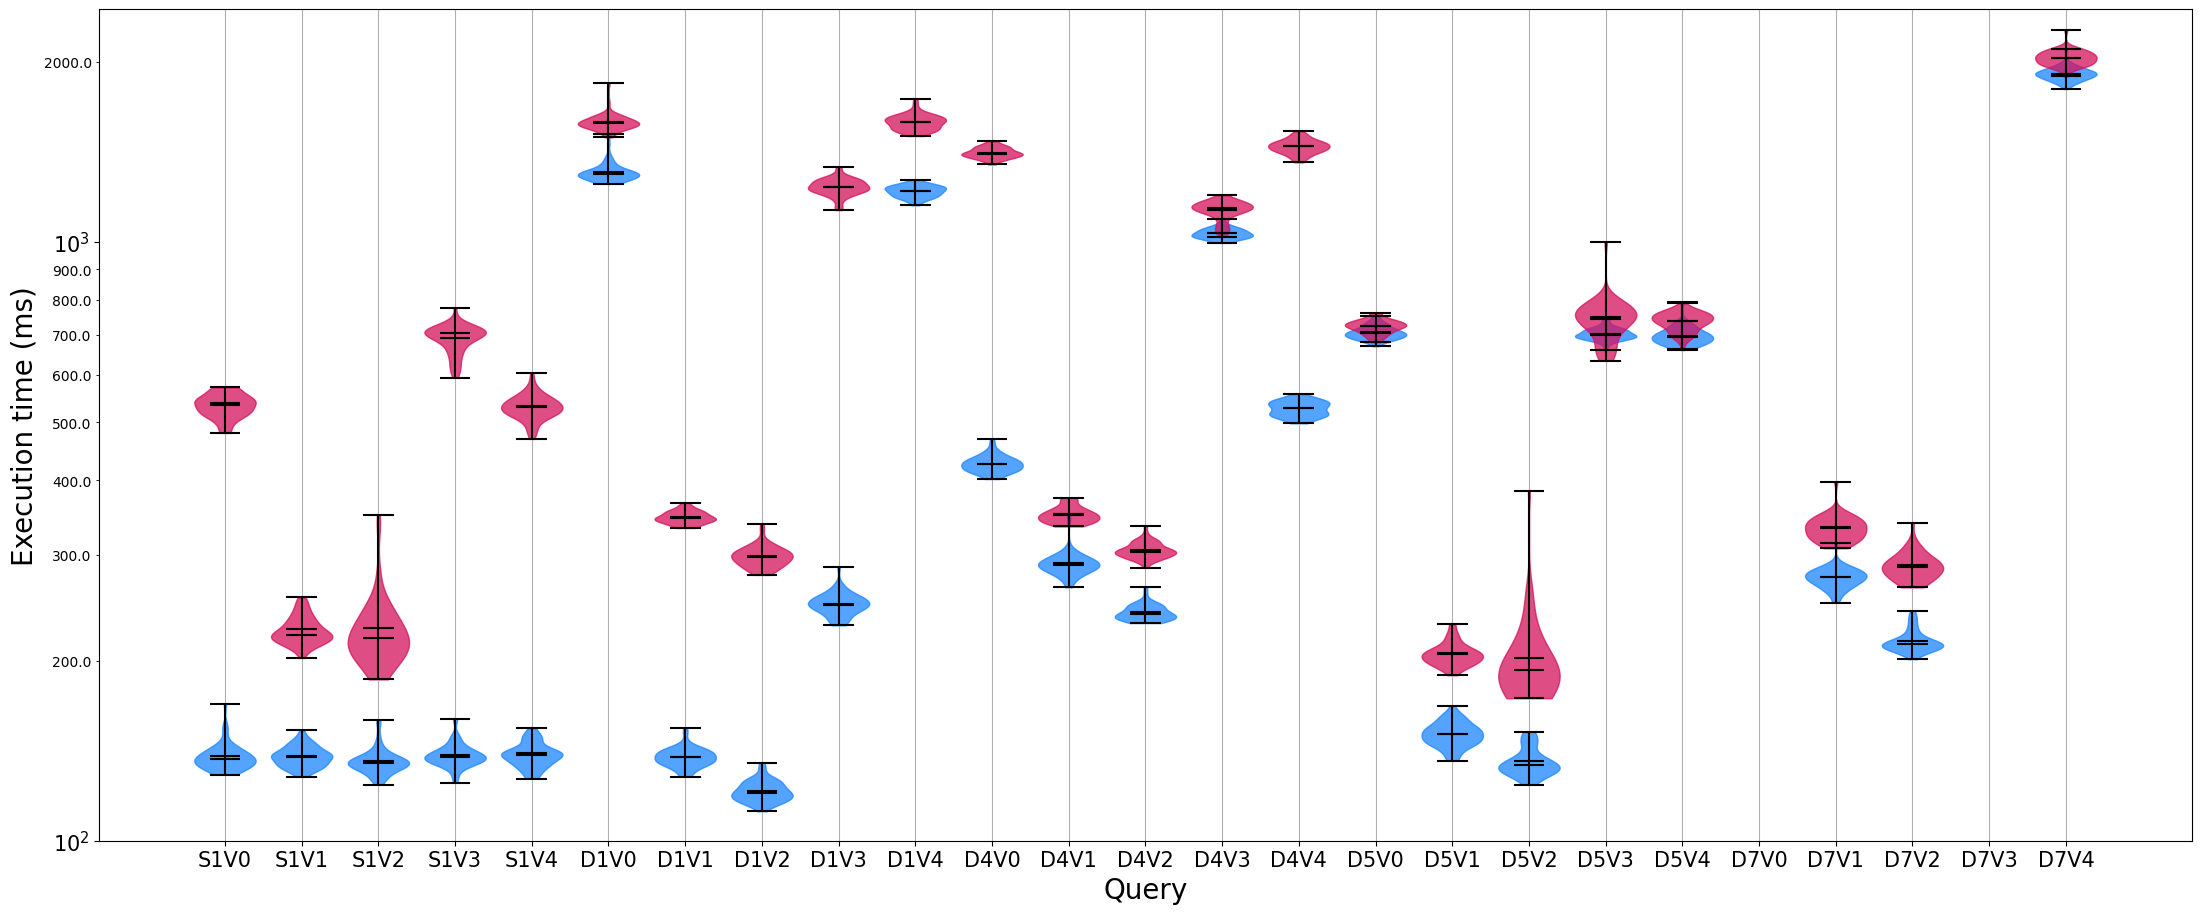

In [25]:
yaxisIndexes = np.arange(50, 2500, 200)
fig, ax = plt.subplots()
ratio = 6/15
number = 27
fig.set_size_inches(number, number*ratio)
ax.set_yticks(yaxisIndexes)
ax.set_ylim(bottom=100)
ax.set_yscale('log', base=10)

xticks = [1.25*i for i in range(0,5*len(queriesBetterPerformance))]
ax.set_xticks(xticks)
xtickLabel = []
for _,label in queriesBetterPerformance:
    xtickLabel+= ["{}{}".format(label, i) for i in range(0,5)]
ax.set_xticklabels(xtickLabel, fontsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))

ax.set_xlabel("Query", fontsize=20)
ax.set_ylabel("Execution time (ms)", fontsize=20)
ax.grid(axis="x")

indexes =  np.linspace(0, 5, 5)
initialIndex = np.linspace(0, 5, 5)
for query,_ in queriesBetterPerformance:
    appendPlotExecutionTime(ax, query, indexes)
    indexes = np.arange(indexes[-1]+1.25, indexes[-1]+6.25+0.1, 1.25)
pathBetterQueries = os.path.join(figureFolder,"better_performance_execution_time.svg")
fig.savefig(pathBetterQueries)

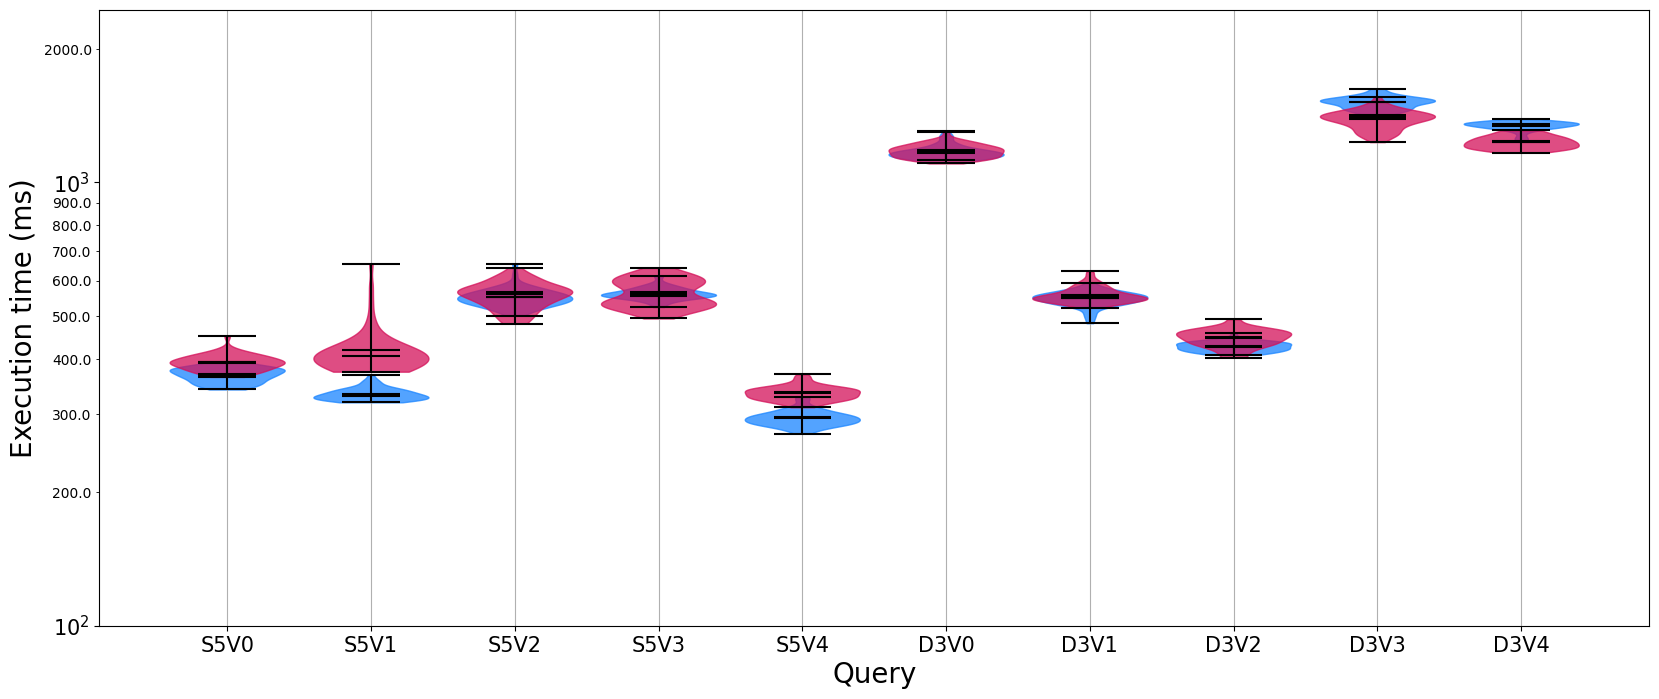

In [26]:
yaxisIndexes = np.arange(50, 2500, 200)
fig, ax = plt.subplots()
ratio = 6/15
number = 20
fig.set_size_inches(number, number*ratio)
ax.set_yticks(yaxisIndexes)
ax.set_ylim(bottom=100)
ax.set_yscale('log', base=10)

xticks = [1.25*i for i in range(0,5*len(queriesSimilarPerformance))]
ax.set_xticks(xticks)
xtickLabel = []
for _,label in queriesSimilarPerformance:
    xtickLabel+= ["{}{}".format(label, i) for i in range(0,5)]
ax.set_xticklabels(xtickLabel, fontsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))

ax.set_xlabel("Query", fontsize=20)
ax.set_ylabel("Execution time (ms)", fontsize=20)
ax.grid(axis="x")

indexes =  np.linspace(0, 5, 5)
initialIndex = np.linspace(0, 5, 5)
for query,_ in queriesSimilarPerformance:
    appendPlotExecutionTime(ax, query, indexes)
    indexes = np.arange(indexes[-1]+1.25, indexes[-1]+6.25+0.1, 1.25)
pathSimilarQueries = os.path.join(figureFolder,"similar_performance_execution_time.svg")
fig.savefig(pathSimilarQueries)

# Number of HTTP Request

## Single plot

### Util

In [27]:
def plotOneQueryExecutionTime(queryName, queryLabelTemplate):
    indexes = np.arange(0, 5, 1)
    yaxisIndexes = np.arange(0, 200, 500)
    width = 0.25
    multiplier = 0
    
    fig, ax = plt.subplots(layout='constrained')
    colors = ["#1A85FF", "#D41159"]
    labels = ["Shape Index", "Type Index"]
    
    for i, value in enumerate([numberHttpRequestShapeIndex[queryName], numberHttpRequestTypeIndex[queryName]]):
        offset = width * multiplier
        rects = ax.bar(indexes + offset, value, width, color=colors[i], label=labels[i])
        ax.bar_label(rects, padding=3)
        multiplier += 1
        
    ax.set_xticks(indexes)
    ax.set_xticklabels(["{}V{}".format(queryLabelTemplate,i) for i,v in enumerate(indexes)])
    ax.set_xlabel("Query")
    ax.set_ylabel("Number HTTP request")
    ax.set_ylim(0)
    ax.legend()

### Plots

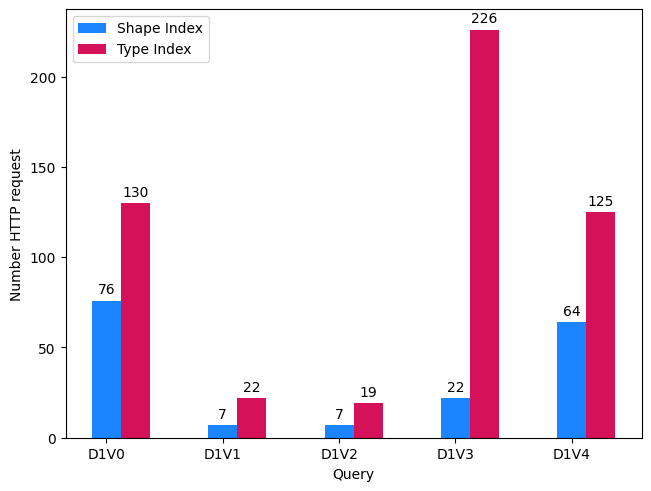

In [28]:
queryName ="queries/parsed/interactive-discover-1.sparql.json"
plotOneQueryExecutionTime(queryName, "D1")

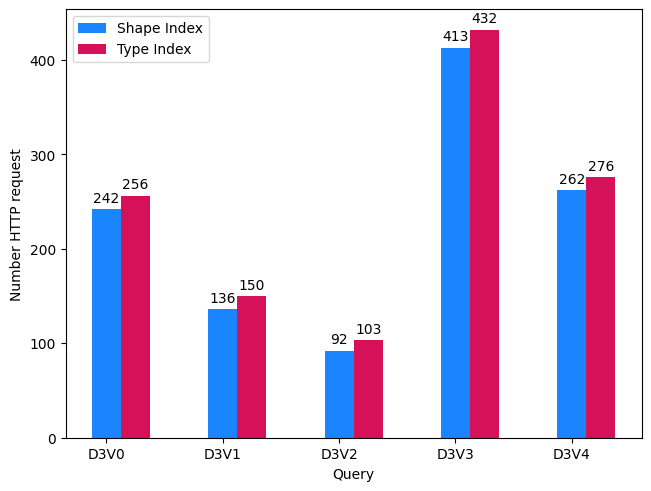

In [29]:
queryName ="queries/parsed/interactive-discover-3.sparql.json"
plotOneQueryExecutionTime(queryName, "D3")

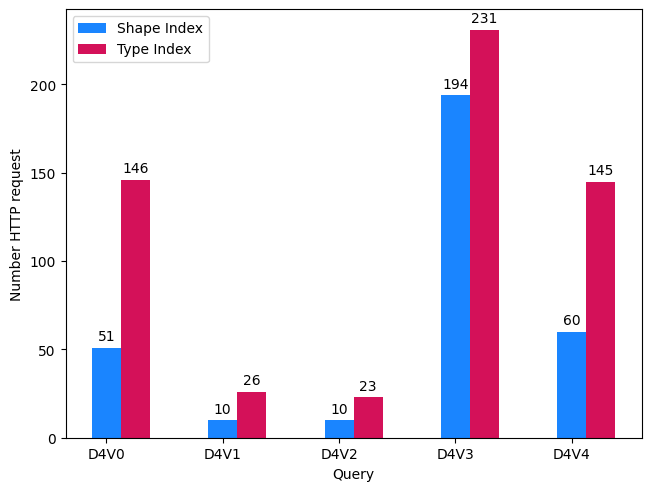

In [30]:
queryName ="queries/parsed/interactive-discover-4.sparql.json"
plotOneQueryExecutionTime(queryName, "D4")

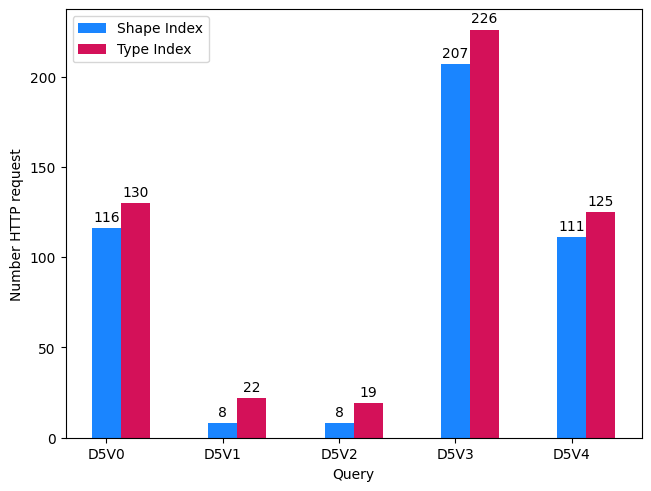

In [31]:
queryName ="queries/parsed/interactive-discover-5.sparql.json"
plotOneQueryExecutionTime(queryName, "D5")

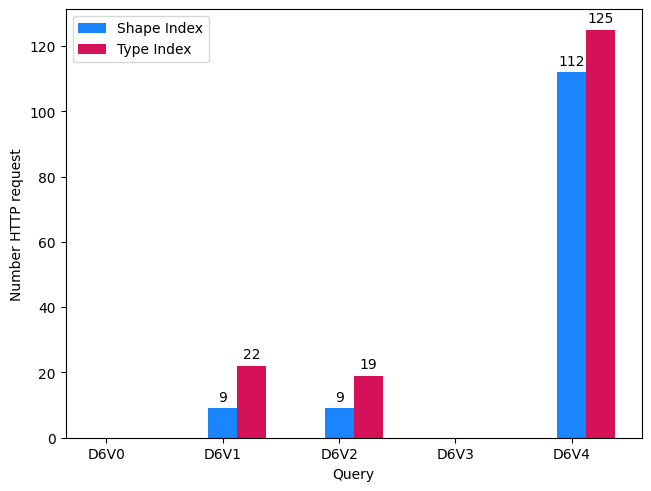

In [32]:
queryName ="queries/parsed/interactive-discover-6.sparql.json"
plotOneQueryExecutionTime(queryName, "D6")

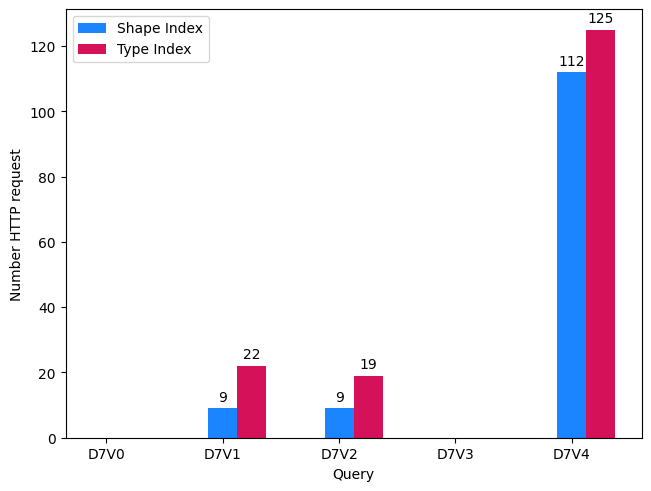

In [33]:
queryName ="queries/parsed/interactive-discover-7.sparql.json"
plotOneQueryExecutionTime(queryName, "D7")

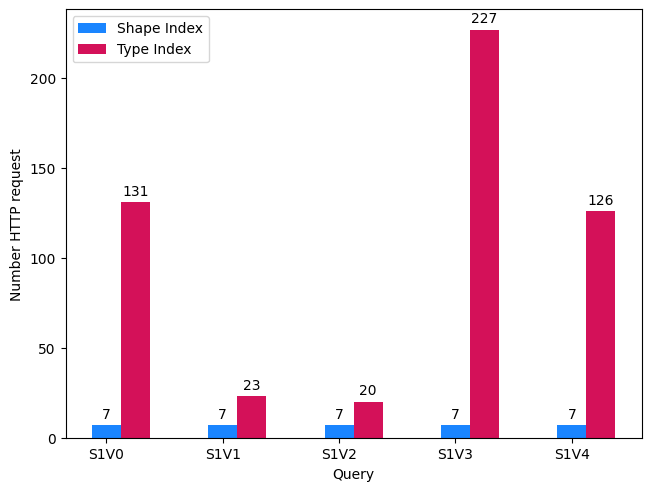

In [34]:
queryName ="queries/parsed/interactive-short-1.sparql.json"
plotOneQueryExecutionTime(queryName, "S1")

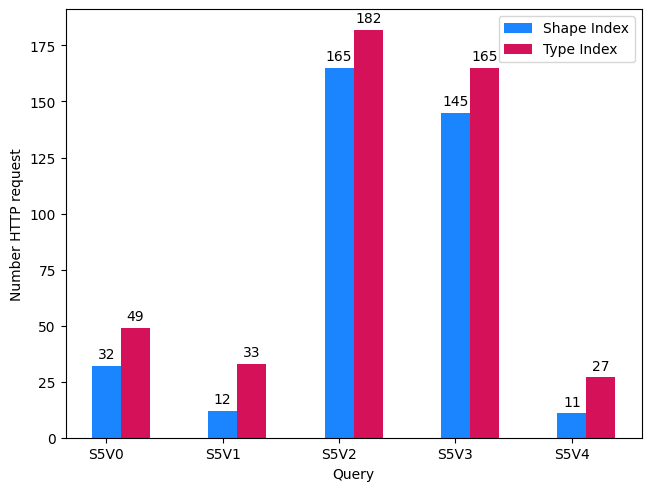

In [35]:
queryName ="queries/parsed/interactive-short-5.sparql.json"
plotOneQueryExecutionTime(queryName, "S5")

## All queries

### Util

In [36]:
def appendPlotHttpRequest(ax, queryName, indexes, labeled=True):
    width = 0.5
    multiplier = 0
    
    colors = ["#1A85FF", "#D41159"]
    labels = ["Shape Index", "Type Index"]
    
    for i, value in enumerate([numberHttpRequestShapeIndex[queryName], numberHttpRequestTypeIndex[queryName]]):
        offset = width * multiplier
        rects = ax.bar(indexes + offset - width/2, value, width, color=colors[i])
        if labeled:
            ax.bar_label(rects, padding=3)
        multiplier += 1

### Plots

In [37]:
queriesHttpRequests = [
    ["queries/parsed/interactive-short-1.sparql.json", "S1V"],
    ["queries/parsed/interactive-short-5.sparql.json", "S5V"],
    
    ["queries/parsed/interactive-discover-1.sparql.json", "D1V"],
    ["queries/parsed/interactive-discover-3.sparql.json", "D3V"],
    ["queries/parsed/interactive-discover-4.sparql.json", "D4V"],
    ["queries/parsed/interactive-discover-5.sparql.json", "D5V"],
    ["queries/parsed/interactive-discover-7.sparql.json", "D7V"],

    #["queries/parsed/interactive-complex-8.sparql.json", "C8V"],
]

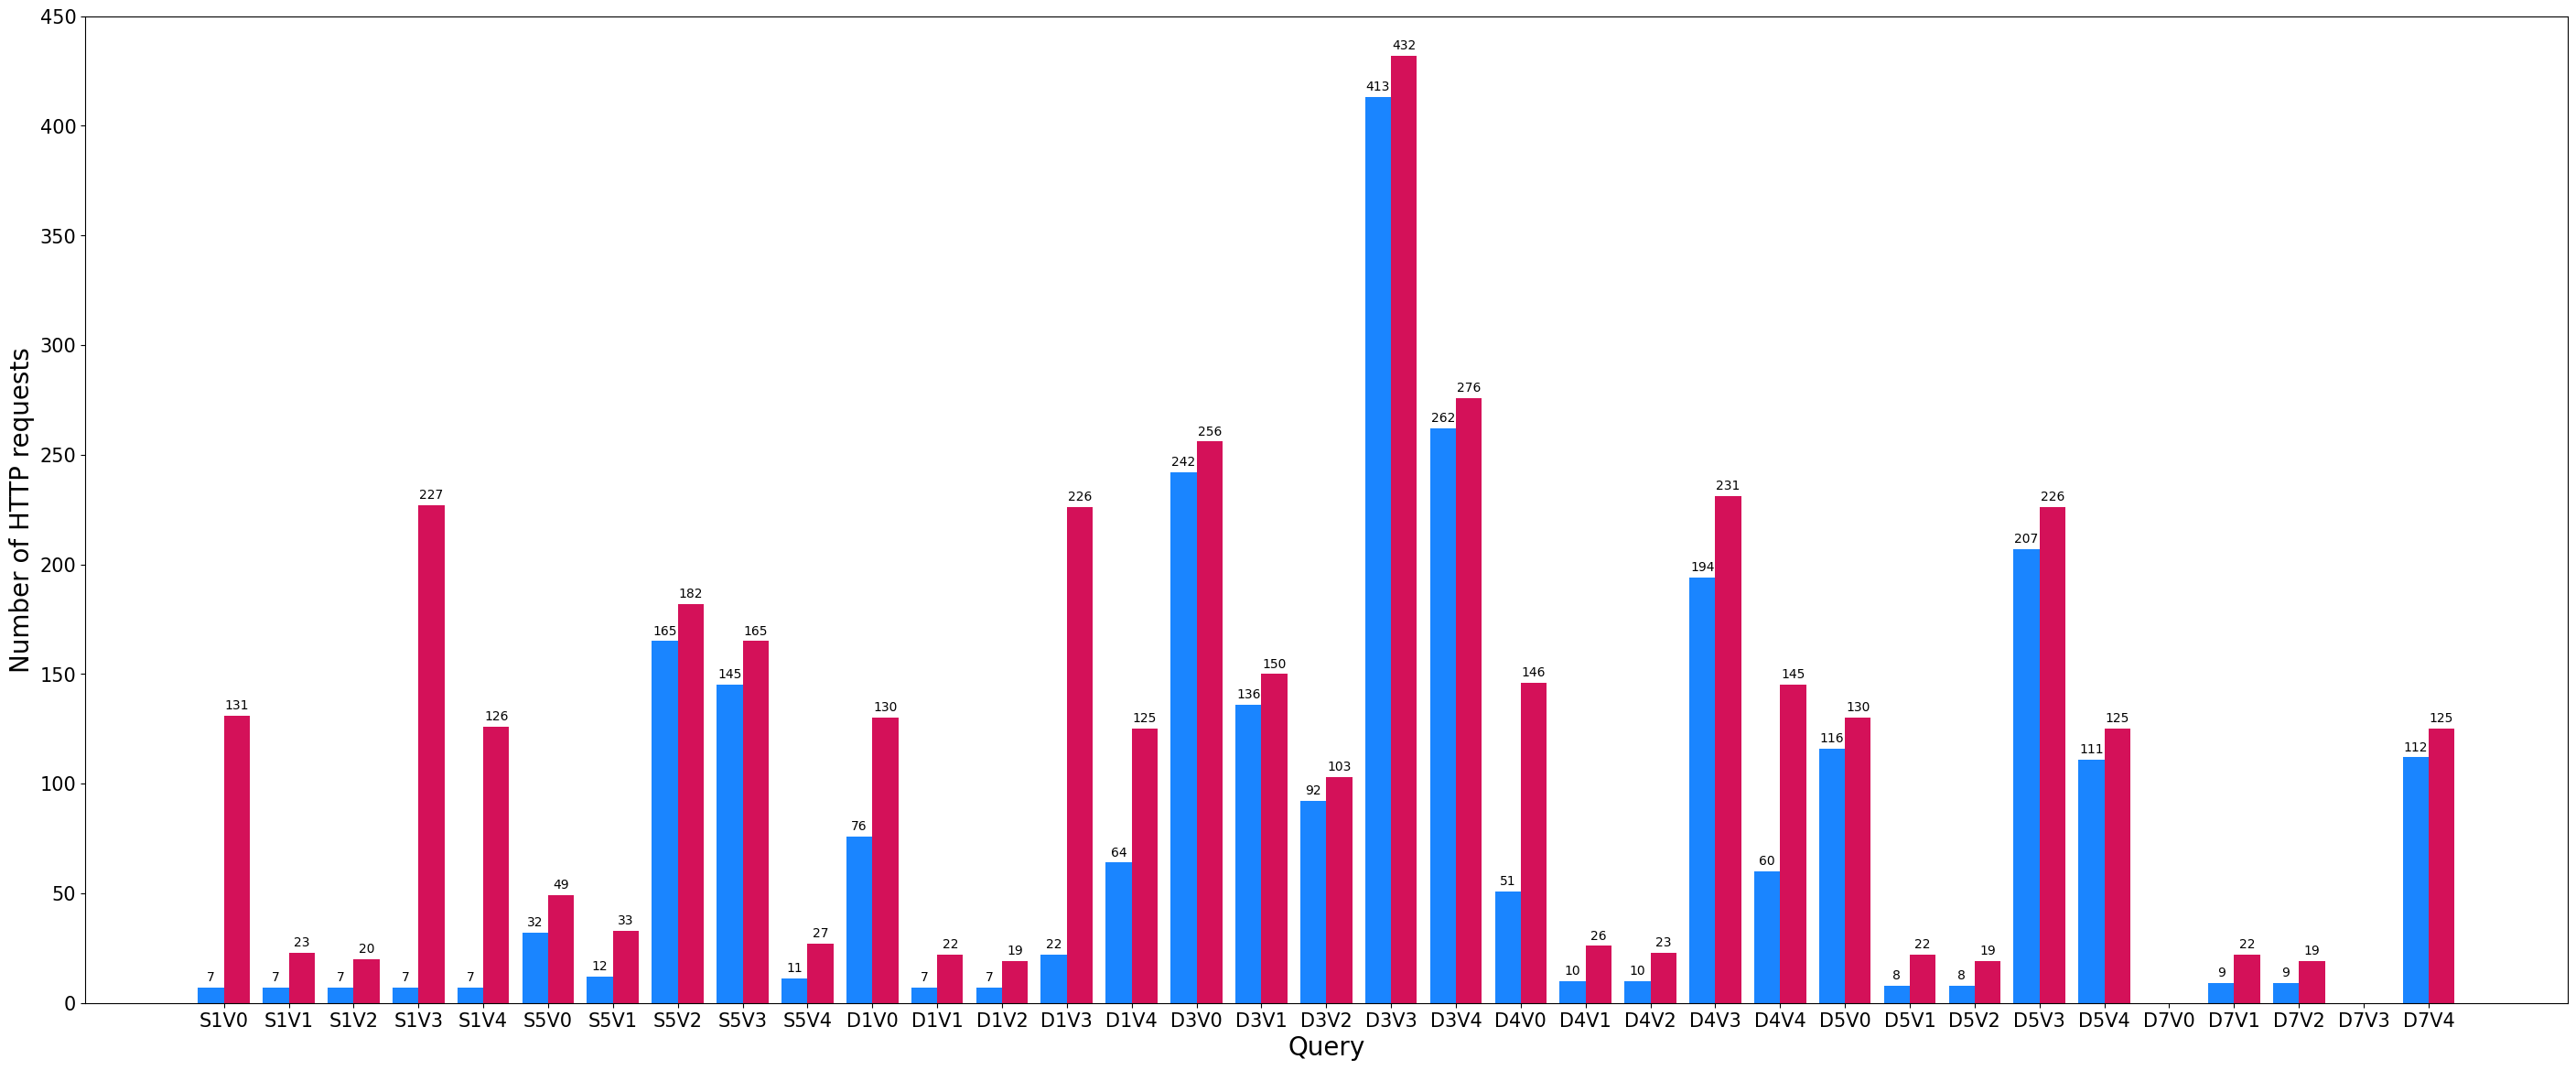

In [38]:
yaxisIndexes = np.arange(0, 500, 50)

fig, ax = plt.subplots()
ratio = 6/15
number = 35
fig.set_size_inches(number, number*ratio)
ax.set_yticks(yaxisIndexes)
ax.set_ylim(bottom=0)

xticks = [1.25*i for i in range(0,5*len(queries))]
ax.set_xticks(xticks)
xtickLabel = []
for _,label in queriesHttpRequests:
    xtickLabel+= ["{}{}".format(label, i) for i in range(0,5)]
ax.set_xticklabels(xtickLabel, fontsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.set_xlabel("Query", fontsize=20)
ax.set_ylabel("Number of HTTP requests", fontsize=20)

indexes =  np.linspace(0, 5, 5)
initialIndex = np.linspace(0, 5, 5)

for query,_ in queriesHttpRequests:
    appendPlotHttpRequest(ax, query, indexes)
    indexes = np.arange(indexes[-1]+1.25, indexes[-1]+6.25+0.1, 1.25)
pathAllQueriesHttpRequests = os.path.join(figureFolder,"all_queries_number_http_request.svg")
fig.savefig(pathAllQueriesHttpRequests)

# Fused plot HTTP request and execution time

In [39]:
queries = [
    ["queries/parsed/interactive-short-1.sparql.json", "S1V"],
    ["queries/parsed/interactive-short-5.sparql.json", "S5V"],
    
    ["queries/parsed/interactive-discover-1.sparql.json", "D1V"],
    ["queries/parsed/interactive-discover-3.sparql.json", "D3V"],
    ["queries/parsed/interactive-discover-4.sparql.json", "D4V"],
    ["queries/parsed/interactive-discover-5.sparql.json", "D5V"],
    ["queries/parsed/interactive-discover-7.sparql.json", "D7V"],

    #["queries/parsed/interactive-complex-8.sparql.json", "C8V"],
]

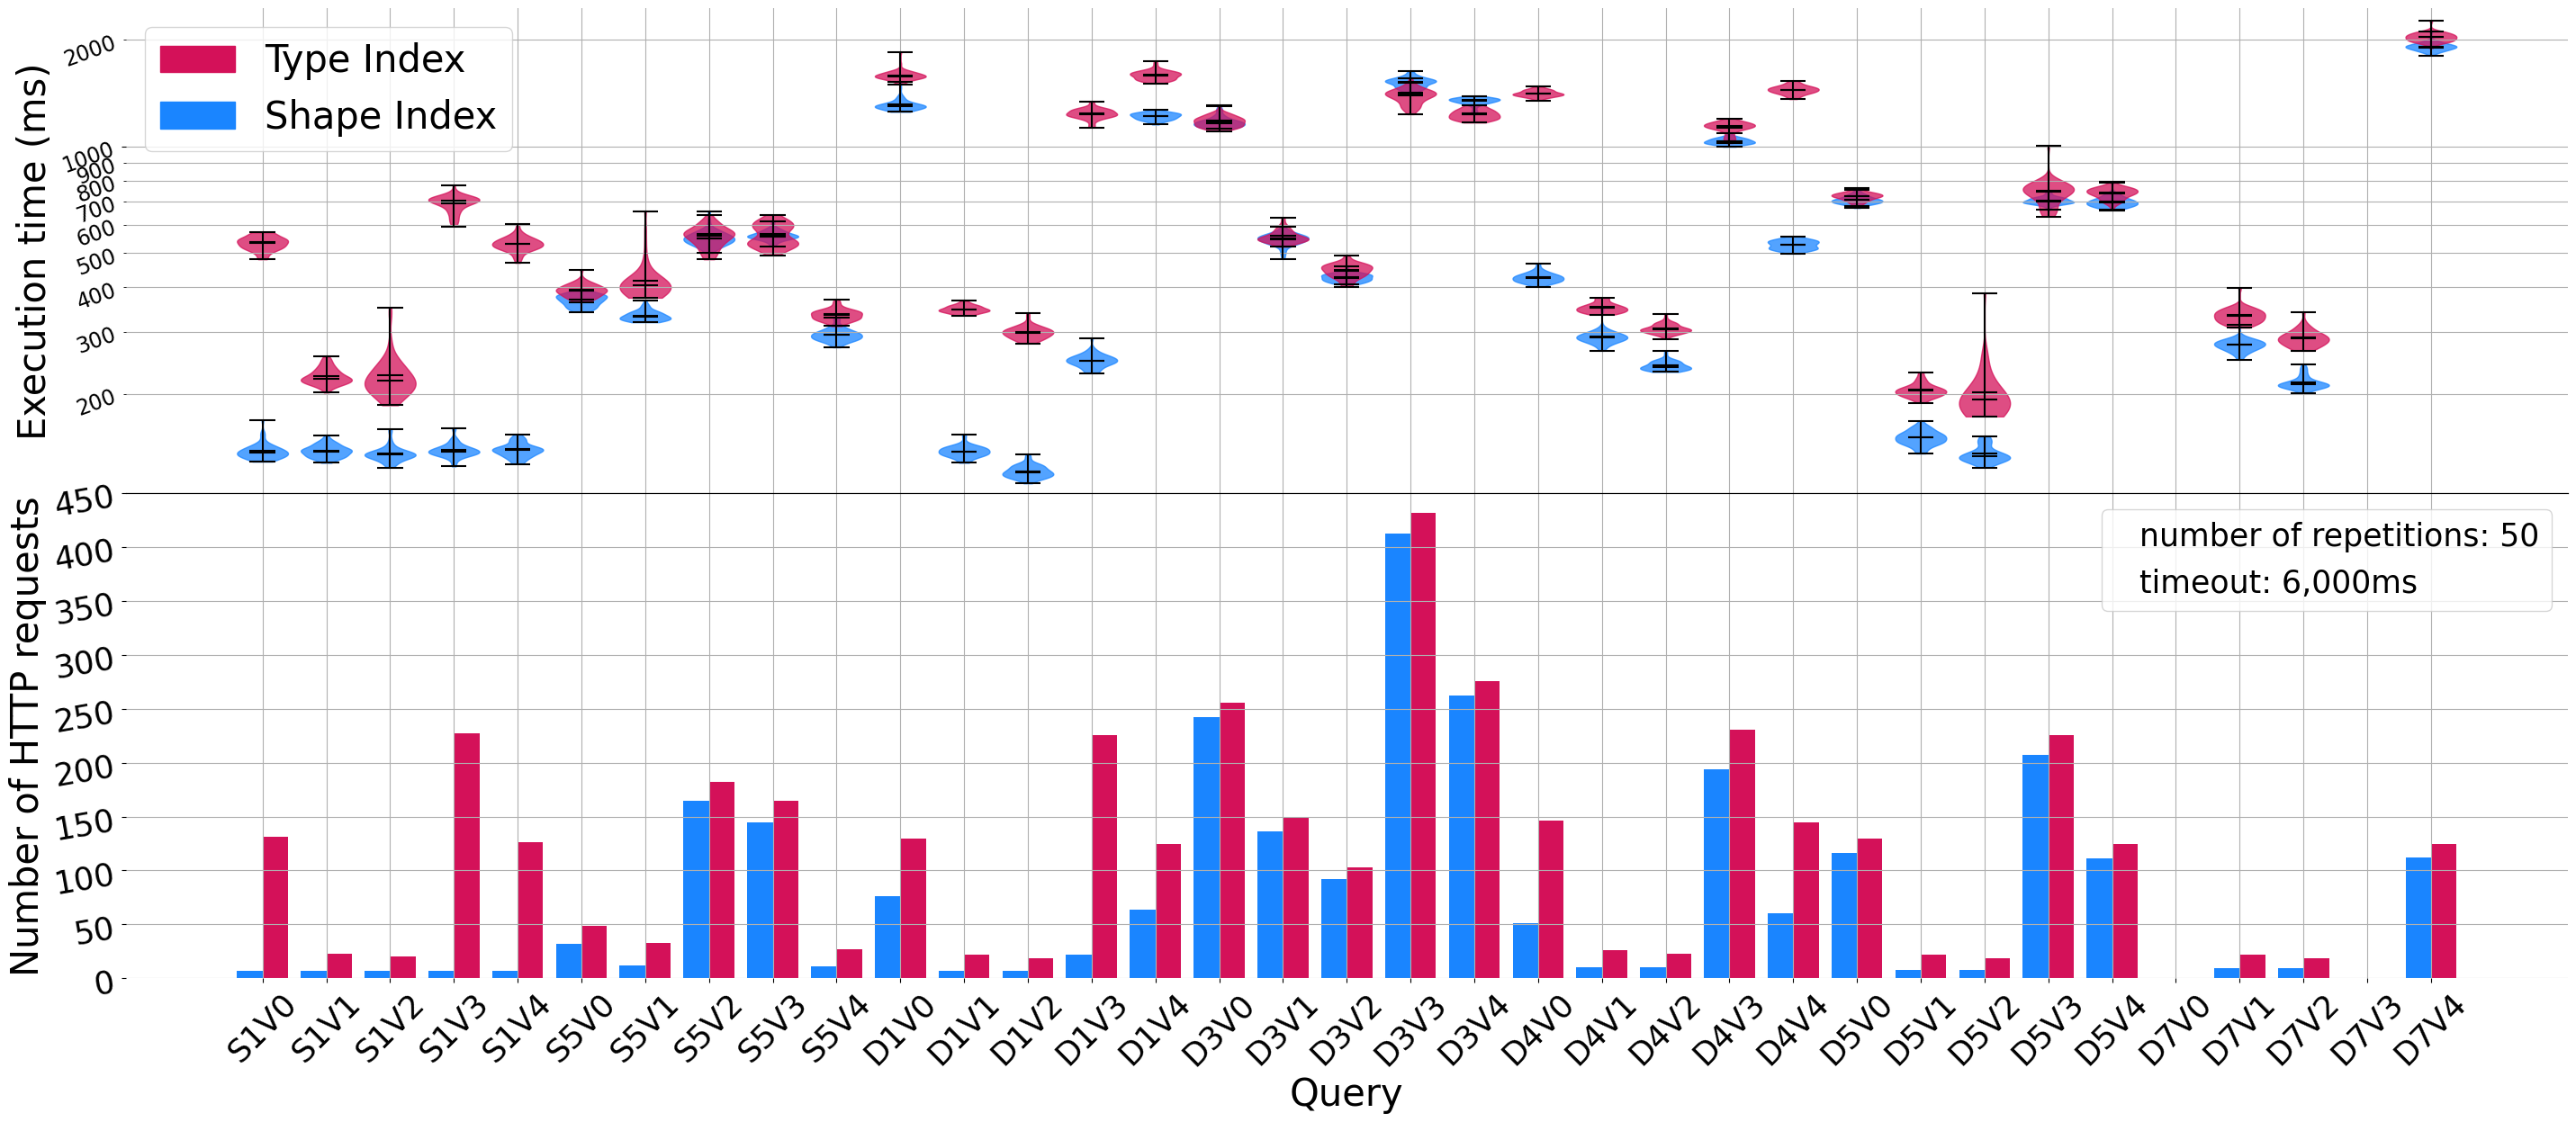

In [98]:
thickSize = 17
fig, axs = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0)
number = 35
ratio = 6/15
fig.set_size_inches(number, number*ratio)

for ax in axs.flatten():
    for pos in ['right', 'top', 'bottom', 'left']:
        ax.spines[pos].set_visible(False)

axs[0].spines['bottom'].set_visible(True)
axs[1].spines['top'].set_visible(True)

yaxisIndexes = np.arange(50, 2500, 200)
ratio = 6/15
number = 35
axs[0].set_yticks(yaxisIndexes)
axs[0].set_ylim(bottom=105)
axs[0].set_yscale('log', base=10)

xticks = [1.25*i for i in range(0,5*len(queries))]
axs[0].set_xticks(xticks)
xtickLabel = []
for _,label in queries:
    xtickLabel+= ["{}{}".format(label, i) for i in range(0,5)]
axs[0].set_xticklabels(xtickLabel, fontsize=thickSize)
axs[0].tick_params(axis='y', labelsize=thickSize, rotation=20)

axs[0].yaxis.set_major_formatter(ScalarFormatter())
axs[0].yaxis.set_minor_formatter(ScalarFormatter())

axs[0].tick_params(axis='y', which='minor', labelsize=thickSize, rotation=20)

axs[0].set_ylabel("Execution time (ms)", fontsize=30)
axs[0].grid(which='minor')
axs[0].grid()

indexes =  np.linspace(0, 5, 5)
initialIndex = np.linspace(0, 5, 5)
for query,_ in queries:
    appendPlotExecutionTime(axs[0], query, indexes)
    indexes = np.arange(indexes[-1]+1.25, indexes[-1]+6.25+0.1, 1.25)


yaxisIndexes = np.arange(0, 500, 50)
axs[1].set_yticks(yaxisIndexes)
axs[1].set_ylim(bottom=0)
axs[1].grid()

xticks = [1.25*i for i in range(0,5*len(queries))]
axs[1].set_xticks(xticks)
xtickLabel = []
for _,label in queriesHttpRequests:
    xtickLabel+= ["{}{}".format(label, i) for i in range(0,5)]
axs[1].set_xticklabels(xtickLabel, fontsize=thickSize*1.5, rotation=45)
axs[1].tick_params(axis='y', labelsize=thickSize*1.5, rotation=10)

axs[1].set_xlabel("Query", fontsize=30)
axs[1].set_ylabel("Number of HTTP requests", fontsize=30)

indexes =  np.linspace(0, 5, 5)
initialIndex = np.linspace(0, 5, 5)

for query,_ in queriesHttpRequests:
    appendPlotHttpRequest(axs[1], query, indexes, False)
    indexes = np.arange(indexes[-1]+1.25, indexes[-1]+6.25+0.1, 1.25)

typeIndexPatch = mpatches.Patch(color='#D41159', label='Type Index')
shapeIndexPatch = mpatches.Patch(color='#1A85FF', label='Shape Index')
repetitionPatch = mpatches.Patch(color="None", label='number of repetitions: 50')
timeoutPatch = mpatches.Patch(color="None", label='timeout: 6,000ms')

axs[0].legend(handles=[typeIndexPatch, shapeIndexPatch], prop={'size': 30})
axs[1].legend(handles=[repetitionPatch,timeoutPatch],handlelength=0, handleheight=0, prop={'size': 25})

In [99]:
pathCombinedPlot = os.path.join(figureFolder,"combined.eps")
fig.savefig(pathCombinedPlot, format='eps')

pathCombinedPlot = os.path.join(figureFolder,"combined.svg")
fig.savefig(pathCombinedPlot)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


# Table of result

## Util

In [41]:
def generateTable(meanExecutionTime,stdExecutionTime,numberHttpRequest):
    headers = ["Query", "avg execution time", "std execution time", "number of HTTP request"]
    table = [] 
    reNameOfQueryFromKey = re.compile(r'queries/parsed/interactive-(?P<query>.*).sparql.json')
    for query, versions in meanExecutionTime.items():
        queryName = reNameOfQueryFromKey.search(query).group("query")
        for versionLabel, currentExecutionTime in enumerate(versions):
            currentStdExecutionTime = round(stdExecutionTime[query][versionLabel])
            currentNHttpRequest = round(numberHttpRequest[query][versionLabel])
            currentRow = ["{} version {}".format(queryName, versionLabel),
                          round(currentExecutionTime) if currentExecutionTime!=-1 else "-",
                          currentStdExecutionTime if currentStdExecutionTime!=-1 else "-",
                          currentNHttpRequest if currentNHttpRequest!=-1 else "-"]
            table.append(currentRow)
    return [table, headers]

In [42]:
def formatTimeBothValue(v1,v2):
    if v1=="-" and v2==v1:
        return v1
    else:
        return "{}/{}".format(v1,v2)
        
def formatRatio(v1,v2):
    if v1=="-" or v2=="-":
        return ["-","-"]
    else:
        return [round(v1/v2,2), round(((v2-v1)/v2)*100)]
        
def ratioOfRatio(v1,v2):
    
    if v1=="-" or v2=="-":
        return "-"
    else:
        return round(v1/v2,2)
        
def generateTableBoth(tableOfRatio=False):
    headers = ["Query",
               "avg execution time",
               "std execution time",
               "number of HTTP request",
               "Percentage of reduction HTTP request",
               "Percentage of reduction execution time",
               "Ratio of HTTP request by ratio of execution time"]
    if tableOfRatio:
        headers = ["Query (SI/TI)",
                   "Std execution time",
                   "Percentage of reduction HTTP request",
                   "Percentage of reduction execution time",
                   "Ratio of HTTP request by ratio of execution time"]
    table = [] 
    reNameOfQueryFromKey = re.compile(r'queries/parsed/interactive-(?P<query>.*).sparql.json')
    for query, versions in meanExecutionTimeShapeIndex.items():
        queryName = reNameOfQueryFromKey.search(query).group("query")
        for versionLabel, currentExecutionTimeShapeIndex in enumerate(versions):

            currentExecutionTimeShapeIndex = round(currentExecutionTimeShapeIndex) if currentExecutionTimeShapeIndex!=-1 else "-"
            
            currentExecutionTimeTypeIndex = round(meanExecutionTimeTypeIndex[query][versionLabel])
            currentExecutionTimeTypeIndex = currentExecutionTimeTypeIndex if currentExecutionTimeTypeIndex!=-1 else "-"

            
            currentStdExecutionTimeShapeIndex = round(stdExecutionTimeShapeIndex[query][versionLabel])
            currentStdExecutionTimeShapeIndex = currentStdExecutionTimeShapeIndex if currentStdExecutionTimeShapeIndex!=-1 else "-"
            
            currentStdExecutionTimeTypeIndex = round(stdExecutionTimeTypeIndex[query][versionLabel])
            currentStdExecutionTimeTypeIndex = currentStdExecutionTimeTypeIndex if currentStdExecutionTimeTypeIndex!=-1 else "-"

            
            currentNHttpRequestShapeIndex = round(numberHttpRequestShapeIndex[query][versionLabel])
            currentNHttpRequestShapeIndex = currentNHttpRequestShapeIndex  if currentNHttpRequestShapeIndex!=-1 else "-"
            
            currentNHttpRequestTypeIndex = round(numberHttpRequestTypeIndex[query][versionLabel])
            currentNHttpRequestTypeIndex = currentNHttpRequestTypeIndex  if currentNHttpRequestTypeIndex!=-1 else "-"

            ratioNHttpRequest = formatRatio(currentNHttpRequestShapeIndex, currentNHttpRequestTypeIndex)
            ratioExecutionTime = formatRatio(currentExecutionTimeShapeIndex, currentExecutionTimeTypeIndex)
            
            currentRow = ["{} version {}".format(queryName, versionLabel),
                          formatTimeBothValue(currentExecutionTimeShapeIndex, currentExecutionTimeTypeIndex),
                          formatTimeBothValue(currentStdExecutionTimeShapeIndex, currentStdExecutionTimeTypeIndex),
                          formatTimeBothValue(currentNHttpRequestShapeIndex, currentNHttpRequestTypeIndex),
                          ratioNHttpRequest[1],
                          ratioExecutionTime[1],
                          ratioOfRatio(ratioNHttpRequest[0], ratioExecutionTime[0])
                         ]
            if tableOfRatio:
                currentRow = ["{} version {}".format(queryName, versionLabel),
                          formatTimeBothValue(currentStdExecutionTimeShapeIndex, currentStdExecutionTimeTypeIndex),
                          ratioNHttpRequest[1],
                          ratioExecutionTime[1],
                          ratioOfRatio(ratioNHttpRequest[0], ratioExecutionTime[0])]
            table.append(currentRow)
    return [table, headers]

## Shape Index

In [43]:
table,headers = generateTable(meanExecutionTimeShapeIndex,stdExecutionTimeShapeIndex,numberHttpRequestShapeIndex)
tabulate(table, headers, tablefmt="html")

Query,avg execution time,std execution time,number of HTTP request
complex-8 version 0,-,-,-
complex-8 version 1,-,-,-
complex-8 version 2,-,-,-
complex-8 version 3,-,-,-
complex-8 version 4,-,-,-
discover-1 version 0,1309,48,76
discover-1 version 1,138,5,7
discover-1 version 2,121,5,7
discover-1 version 3,249,11,22
discover-1 version 4,1216,27,64


## Type index

In [44]:
table,headers = generateTable(meanExecutionTimeTypeIndex,stdExecutionTimeTypeIndex,numberHttpRequestTypeIndex)
tabulate(table, headers, tablefmt="html")

Query,avg execution time,std execution time,number of HTTP request
complex-8 version 0,-,-,-
complex-8 version 1,-,-,-
complex-8 version 2,-,-,-
complex-8 version 3,-,-,-
complex-8 version 4,-,-,-
discover-1 version 0,1586,51,130
discover-1 version 1,347,8,22
discover-1 version 2,299,12,19
discover-1 version 3,1237,40,226
discover-1 version 4,1588,47,125


## comparison (Shape Index by Type Index)

In [45]:
table,headers = generateTableBoth(True)
tabulate(table, headers, tablefmt="html")

Query (SI/TI),Std execution time,Percentage of reduction HTTP request,Percentage of reduction execution time,Ratio of HTTP request by ratio of execution time
complex-8 version 0,-,-,-,-
complex-8 version 1,-,-,-,-
complex-8 version 2,-,-,-,-
complex-8 version 3,-,-,-,-
complex-8 version 4,-,-,-,-
discover-1 version 0,48/51,42,17,0.7
discover-1 version 1,5/8,68,60,0.8
discover-1 version 2,5/12,63,60,0.92
discover-1 version 3,11/40,90,80,0.5
discover-1 version 4,27/47,49,23,0.66


# Statistical significance

## Util

In [46]:
def generateTablePvalue(pValues, pValueThreshold):
    headers = ["Query", "SI faster query execution", "P value", "SI different execution time than TI", "P value"]
    table = [] 
    reNameOfQueryFromKey = re.compile(r'queries/parsed/interactive-(?P<query>.*).sparql.json')
    for query, versions in pValues.items():
        queryName = reNameOfQueryFromKey.search(query).group("query")
        for versionLabel, currentPValue in versions.items():
            if currentPValue == None:
                currentRow = [
                    "{} version {}".format(queryName, versionLabel),
                    "-",
                    "-",
                    "-",
                    "-"
                ]
                table.append(currentRow)
            else:
                currentRow = ["{} version {}".format(queryName, versionLabel),
                              currentPValue[0] <= pValueThreshold,
                              "{:.2e}".format(currentPValue[0]),
                              currentPValue[1] <= pValueThreshold,
                              "{:.2e}".format(currentPValue[1])
                             ]
                table.append(currentRow)
    return [table, headers]

## Hypothesis

We use Mann-Whitney U test because not every distribution seems normal and the variance is not always similar between the results from the shape index and the type index. The observations are independant.

Null hypothesis: The shape index execute the query faster

Alternative hypothesis: The type index execute the query faster

## Calculation

In [47]:
PValuesExecutionTime = {}
pValueThreshold = 0.001

In [48]:
queryName ="queries/parsed/interactive-discover-1.sparql.json"
version ="v0"
x= executionTimeTypeIndex[queryName][version]
y= executionTimeShapeIndex[queryName][version]
result = stats.mannwhitneyu(x=x, y=y, method="exact", alternative = 'greater')
result

MannwhitneyuResult(statistic=2399.0, pvalue=1.5700058385926644e-28)

In [49]:
for query, version in executionTimeTypeIndex.items():
    PValuesExecutionTime[query] = {}
    for versionLabel, versionData in version.items():
        timeoutQuery =False
        for i, val in enumerate(versionData):
            if val==-1 or executionTimeShapeIndex[query][versionLabel][i] == -1:
                PValuesExecutionTime[query][versionLabel] = None
                timeoutQuery = True
                break
            
        if timeoutQuery:
            continue
        pValueGreater = stats.mannwhitneyu(x=versionData,
                           y=executionTimeShapeIndex[query][versionLabel],
                           method="exact",
                           alternative = 'greater').pvalue
        
        pValueEqual = stats.mannwhitneyu(x=versionData,
                           y=executionTimeShapeIndex[query][versionLabel],
                           method="exact",
                           alternative = 'two-sided').pvalue
        PValuesExecutionTime[query][versionLabel] = [pValueGreater, pValueEqual]

In [50]:
table,headers = generateTablePvalue(PValuesExecutionTime,pValueThreshold)
tabulate(table, headers, tablefmt="html")

Query,SI faster query execution,P value,SI different execution time than TI,P value
complex-8 version v0,-,-,-,-
complex-8 version v1,-,-,-,-
complex-8 version v2,-,-,-,-
complex-8 version v3,-,-,-,-
complex-8 version v4,-,-,-,-
discover-1 version v0,True,1.57e-28,True,3.14e-28
discover-1 version v1,True,3.93e-29,True,7.85e-29
discover-1 version v2,True,3.93e-29,True,7.85e-29
discover-1 version v3,True,3.93e-29,True,7.85e-29
discover-1 version v4,True,3.93e-29,True,7.85e-29
